https://www.signalintegrityjournal.com/blogs/7-voice-of-the-experts-signal-integrity/post/355-via-stubs-are-they-all-bad?v=preview

https://en.wikipedia.org/wiki/Sine_wave

In [176]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [276]:
f = 1 * 1000000000 # (Hz)
c = 300000000 # Speed of light (m/s)
Dk = 9.1 # Dielectric Constant

sl = 0.02486 # Stub length (m)

In [274]:
wl = c/(f*np.sqrt(Dk)) # wavelength (m)
wl

0.09944903161976938

In [277]:
f_0 = c/(4*sl*np.sqrt(Dk)) # resonant frequency of stub length (Hz)
f_0

1000090824.8166671

In [189]:
# Compute the area using the composite trapezoidal rule.
def rms(values):
    return np.sqrt(np.mean(values**2))

# Computed reflected phase delay as % (not radians)
def reflectedphasedelay(sl,wl):
    CD = (sl%wl)/wl
    TD = 2 * CD
    return TD

def VdB(vout,vin):
    return 20*np.log10(vout/vin)

display(reflectedphasedelay(sl,wl))

0.8026221945044326

![](https://1.bp.blogspot.com/-Ljl76ycMNu8/Xo4PH4proJI/AAAAAAAAACw/bKxRHeLPOH87D7HLcQWqvQamK0fxlEvpwCLcBGAsYHQ/s1600/Braod%2BDips%2BFigure%2B1.png)

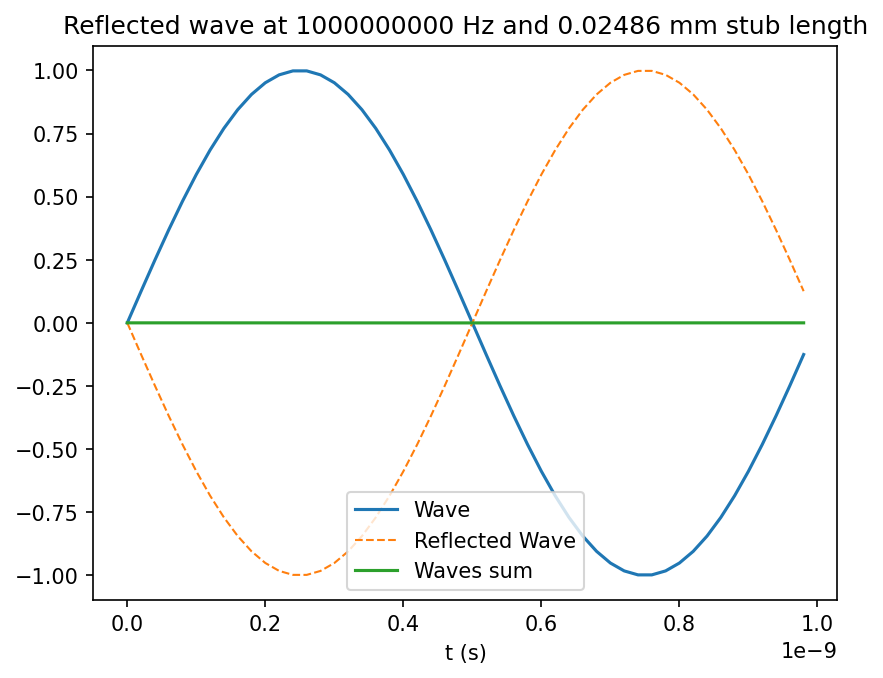

In [180]:
omega = 2 * np.pi * f # angular frequency, the rate of change of the function argument in units of radians per second.
phase = 2 * np.pi * reflectedphasedelay(sl,wl) # specifies (in radians) where in its cycle the oscillation is at t = 0

trange = 1/f
dt = trange/50
time = np.arange(0, trange, dt)

wave = np.sin(omega * time)
waveref = np.sin(omega * time + phase)
insertion = (wave + waveref)/2

fig = plt.figure(dpi=150)
ax = fig.add_subplot()
ax.plot(time, wave, label='Wave')
ax.plot(time, waveref, '--', linewidth=1, label='Reflected Wave')
ax.plot(time, insertion, label='Waves sum')

ax.set_title(f"Reflected wave at {f} Hz and {sl} mm stub length")
ax.set_xlabel("t (s)")
# ax.set_ylabel("wave")
ax.legend(loc='best')

Text(0.5, 0, 'stub length (m)')

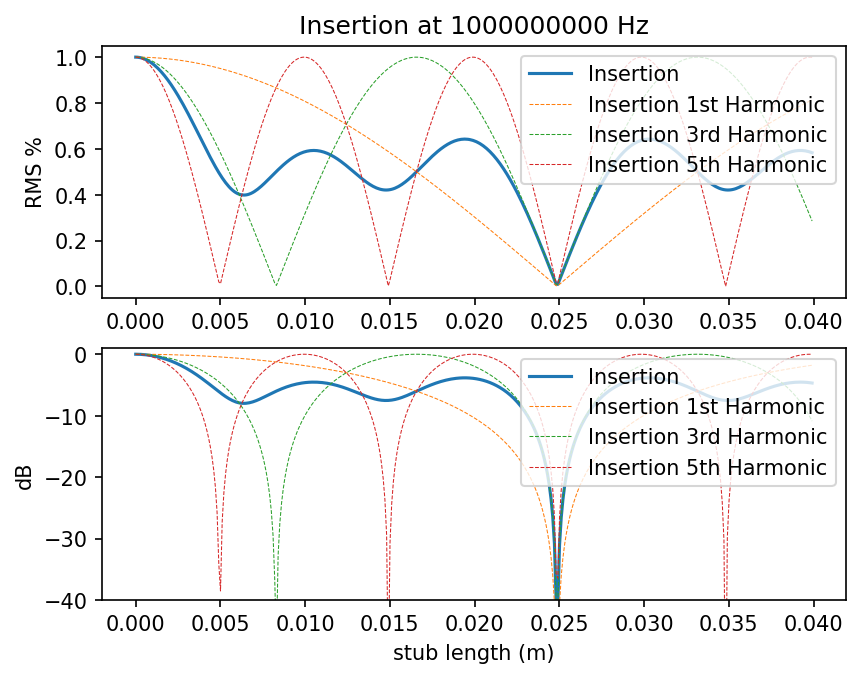

In [268]:
from copy import deepcopy
sls = []
insloss_dB = {1:[],3:[],5:[]}
insloss_rms = deepcopy(insloss_dB)
harmonics = insloss_dB.keys()
inslosstot_dB = []
inslosstot_rms = deepcopy(inslosstot_dB)

for sl in np.arange(0.00001,0.04,0.0001):
    
    time = np.arange(0, trange, dt)
    wave = np.sin(omega * time)
    
    insertions = []
    for idx, harmonic in enumerate(harmonics):

        phase = 2 * np.pi * reflectedphasedelay(sl,wl/harmonic)
        refwave = np.sin(omega * time + phase)
        insertion = (wave + refwave)/2
        insertions.append(insertion)
        insloss_dB[harmonic].append(VdB(rms(insertion),rms(wave)))
        insloss_rms[harmonic].append(rms(insertion)/rms(wave))

    inslosstot_rms.append(rms(sum(insertions)/len(harmonics))/rms(wave))
    inslosstot_dB.append(VdB(rms(sum(insertions)/len(harmonics)),rms(wave))) # averaging RMS values
    # inslosstot_dB.append(sum(insloss_dB[harmonic][-1] for harmonic in harmonics)/len(harmonics)) # averaging the dB values
    
    sls.append(sl)

fig = plt.figure(dpi=150)
ax = fig.add_subplot(2,1,1)
ax.set_title(f"Insertion at {f} Hz")
ax.plot(sls, inslosstot_rms, label='Insertion')
ax.plot(sls, insloss_rms[1], '--', lw=0.5, label='Insertion 1st Harmonic')
ax.plot(sls, insloss_rms[3], '--', lw=0.5, label='Insertion 3rd Harmonic')
ax.plot(sls, insloss_rms[5], '--', lw=0.5, label='Insertion 5th Harmonic')
ax.set_ylabel("RMS %")
ax.legend(loc='upper right')

ax = fig.add_subplot(2,1,2)
ax.plot(sls, inslosstot_dB, label='Insertion')
ax.plot(sls, insloss_dB[1], '--', lw=0.5, label='Insertion 1st Harmonic')
ax.plot(sls, insloss_dB[3], '--', lw=0.5, label='Insertion 3rd Harmonic')
ax.plot(sls, insloss_dB[5], '--', lw=0.5, label='Insertion 5th Harmonic')
ax.set_ylabel("dB")
ax.set_ylim(bottom=-40,top=1)
ax.legend(loc='upper right')
ax.set_xlabel("stub length (m)")
